<a href="https://colab.research.google.com/github/Ramilopez99/RedNeuronal/blob/main/Red_neuronal_b%C3%A1sica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Implementación de la red neuronal con retropropagación

In [2]:
class NetNode(object):

    def __init__(self):
        self.inputs = []
        self.weights = []
        self.value = None

In [3]:
class Network(object):

    def __init__(self, layers):
        self.net = [[NetNode() for _ in range(size)] for size in layers]
        sizes = len(layers)
        for layer in range(1, sizes):
            for node in self.net[layer]:
                for unit in self.net[layer - 1]:
                    node.inputs.append(unit)
                    node.weights.append(0)

    def accuracy(self, examples):
        correct = 0
        for x_test, y_test in examples:
            prediction = self.predict(x_test)
            if (y_test[prediction] == 1):
                correct += 1
        return correct / len(examples)

    def backpropagation(self, eta, examples, epochs):
        inputs = self.net[0]
        outputs = self.net[-1]
        layer_size = len(self.net)
        for layer in self.net[1:]:
            for node in layer:
                node.weights = [np.random.uniform() for _ in range(len(node.weights))]
        for epoch in range(epochs):
            for x_train, y_train in examples:
                for value, node in zip(x_train, inputs):
                    node.value = value
                for layer in self.net[1:]:
                    for node in layer:
                        in_val = [n.value for n in node.inputs]
                        unit_value = np.dot(in_val, node.weights)
                        node.value = self.relu(unit_value)
                delta = [[] for _ in range(layer_size)]
                err = [y_train[i] - outputs[i].value for i in range(len(outputs))]
                delta[-1] = [self.relu_prime(outputs[i].value) * err[i] for i in range(len(outputs))]
                hidden_layers = layer_size - 2
                for i in range(hidden_layers, 0, -1):
                    layer = self.net[i]
                    n_layers = len(layer)
                    w = [[node.weights[l] for node in self.net[i + 1]] for l in range(n_layers)]
                    delta[i] = [self.relu_prime(layer[j].value) * np.dot(w[j], delta[i + 1]) for j in range(n_layers)]
                for i in range(1, layer_size):
                    layer = self.net[i]
                    in_val = [node.value for node in self.net[i - 1]]
                    n_layers = len(self.net[i])
                    for j in range(n_layers):
                        layer[j].weights = np.add(layer[j].weights, np.multiply(eta * delta[i][j], in_val))
            print(f"epoch {epoch}/{epochs} | total error={np.sum(err)/len(examples)}")
    
    def predict(self, input_data):
        inputs = self.net[0]
        for v, n in zip(input_data, inputs):
            n.value = v
        for layer in self.net[1:]:
            for node in layer:
                in_val = [n.value for n in node.inputs]
                unit_value = np.dot(in_val, node.weights)
                node.value = self.relu(unit_value)
        outputs = self.net[-1]
        return outputs.index(max(outputs, key=lambda node: node.value))

    def relu(self, z):
        return max(0, z)

    def relu_prime(self, z):
        return 1 if z > 0 else 0
    
    def weights(self):
        weights = []
        for layer in self.net:
            for node in layer:
                weights.append(node.weights)
        return weights

    def set_weights(self, weights):
        if len(weights) != len(self.net):
            raise ValueError("Número de capas no coincide")
        for i, layer in enumerate(weights):
            if len(layer) != len(self.net[i]):
                raise ValueError("Número de nodos en la capa no coincide")
            for j, node_weights in enumerate(layer):
                if len(node_weights) != len(self.net[i][j].weights):
                    raise ValueError("Número de pesos no coincide")
                self.net[i][j].weights = node_weights

    def sigmoide(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoide_prime(self, z):
        return self.sigmoide(z) * (1 - self.sigmoide(z))   

# Usando la red neuronal con un dataset

In [4]:
from sklearn import datasets
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [5]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)

In [6]:
iris_x_normalized = normalize(iris_X, axis=0)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_x_normalized, iris_y, test_size=0.2, shuffle=True)

In [8]:
y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

In [9]:
examples = []
for i in range(len(X_train)):
    examples.append([X_train[i], y_train[i]])

In [10]:
net = Network([3, 4, 2])
net.backpropagation(0.1, examples, 500)

epoch 0/500 | total error=-0.006049978278837927
epoch 1/500 | total error=-0.00583175601760354
epoch 2/500 | total error=-0.005737640051134938
epoch 3/500 | total error=-0.00565192041356933
epoch 4/500 | total error=-0.005554889920505246
epoch 5/500 | total error=-0.005440039440539093
epoch 6/500 | total error=-0.005303780309974549
epoch 7/500 | total error=-0.005213245631758918
epoch 8/500 | total error=-0.005055746091273816
epoch 9/500 | total error=-0.004863821770888109
epoch 10/500 | total error=-0.004643727134313785
epoch 11/500 | total error=-0.004413449072076619
epoch 12/500 | total error=-0.004194497649241646
epoch 13/500 | total error=-0.003956200631983914
epoch 14/500 | total error=-0.00373927521577673
epoch 15/500 | total error=-0.0035562492266229978
epoch 16/500 | total error=-0.003418374788456816
epoch 17/500 | total error=-0.0033385937203721907
epoch 18/500 | total error=-0.0033595725082036245
epoch 19/500 | total error=-0.00344642339284243
epoch 20/500 | total error=-0.0

In [11]:
#precisión alcanzada con los datos de entrenamiento
accuracy = net.accuracy(examples)
print(f"Accuracy: {accuracy}")

Accuracy: 0.65


In [12]:
#precisión alcanzada con los datos de prueba
examples = []
for i in range(len(X_test)):
    examples.append([X_test[i], y_test[i]])
accuracy = net.accuracy(examples)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7333333333333333


In [13]:
#probando con un dato
prediction = net.predict(X_test[2])
print(f"Desired output: {y_test[2]}")
print(f"Index of output: {prediction}")

Desired output: [1. 0. 0.]
Index of output: 0


# Modificación de la implementación de la red neuronal

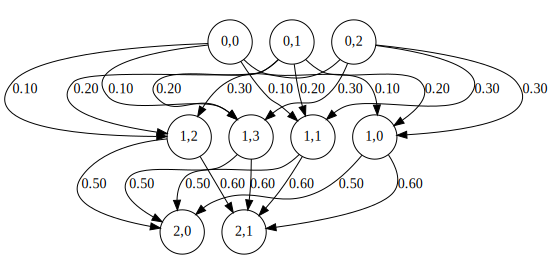

In [25]:
import graphviz

def draw_graph(net):
    dot = graphviz.Digraph()
    dot.attr('node', shape='circle')
    for i, layer in enumerate(net.net):
        with dot.subgraph(name=f'cluster_{i}') as c:
            c.attr(style='invis')
            for j, node in enumerate(layer):
                c.node(f'{i},{j}')
    for i, layer in enumerate(net.net):
        for j, node in enumerate(layer):
            for input_node, weight in zip(node.inputs, node.weights):
                dot.edge(f'{i-1},{net.net[i-1].index(input_node)}', f'{i},{j}', label=f'{weight:.2f}')
    return dot
    
draw_graph(net)

* agrega el método weigths() a la clase Network, de tal forma que permita obtener los pesos de las neuronas

In [26]:
weights = net.weights()

for i, layer in enumerate(weights):
    print(f"Node {i} weights: {layer}")

Node 0 weights: []
Node 1 weights: []
Node 2 weights: []
Node 3 weights: [0.1, 0.2, 0.3]
Node 4 weights: [0.1, 0.2, 0.3]
Node 5 weights: [0.1, 0.2, 0.3]
Node 6 weights: [0.1, 0.2, 0.3]
Node 7 weights: [0.5, 0.5, 0.5, 0.5]
Node 8 weights: [0.6, 0.6, 0.6, 0.6]


* agrega el método set_weights() a la clase Network, de tal forma que permite definir los pesos de las neuronas

In [24]:
new_weights = [
    [
        [],
        [],
        []
    ],
    [
        [0.1, 0.2, 0.3],
        [0.1, 0.2, 0.3],
        [0.1, 0.2, 0.3],
        [0.1, 0.2, 0.3]
    ],
    [
        [0.5, 0.5, 0.5, 0.5],
        [0.6, 0.6, 0.6, 0.6]
    ], 
]

# Establecer los nuevos pesos en la red neuronal
net.set_weights(new_weights)

In [17]:
# modifica la clase Network, para que se pueda decidir qué función de activación utilizar: relu() o sigmoide() EN LA RETROPROPAGACION HABRIA QUE UTILIZAR EL PRIME

In [18]:
# los métodos predict() y accuracy() de la clase Network están implementados para resolver problemas de clasificación
# modifícalos de tal manera que también se puedan utilizar con problemas de regresión

In [19]:
# modifica el método backpropagation() de tal manera que devuelva como resultado el array de valores de los nodos durante las épocas de entrenamiento

In [20]:
# una vez implementados los cambios, entrena la red neuronal del ejemplo de los apuntes
examples = []
examples.append([[0.5, 0.67, 0.5], [0.25, 0.6]])

In [21]:
# ejecuta la red neuronal para los datos de ejemplo de los apuntes
# comprueba los valores de los nodos y de los pesos
# los valores de los nodos tienen que ser los mismos que los de los apuntes
# los valores de los pesos son ligeramente diferentes, ¿por qué?

net = Network([3, 4, 2])

net.set_weights([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# o
net.set_weights([[0.1, 0.1, 0.1], [0.2, 0.2, 0.2], [0.3, 0.3, 0.3], [0.4, 0.4, 0.4], [0.5, 0.5, 0.5, 0.5], [0.6, 0.6, 0.6, 0.6]])

valores_nodos = net.backpropagation(0.9, examples, 1)

print(valores_nodos)
net.weights()

ValueError: ignored